# Les réseaux de neurones sur TensorFlow 2.0 

TensorFlow 2 vous facilite grandement la tâche lorsqu'il s'agit de créer des réseaux de neurones car la librairie intègre une surcouche nommée Keras. Voyons justement via MNIST comment cela fonctionne. 

In [ ]:
# N'oubliez pas que la commande spéciale "!" lancée depuis un notebook vous permet
# de lancer des commandes depuis le terminal. Tout ce qui suit le "!" sur la même ligne
# sera interprété comme une commande du terminal
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 105kB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 3.8MB 32.1MB/s 
     |████████████████████████████████| 450kB 42.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=1d99cc50beac1bf693dabaf993077f1751444d30d860fc563a301aa8bb108d5d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tens

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.__version__

'2.0.0'

In [ ]:
mnist = pd.read_csv("https://pjreddie.com/media/files/mnist_test.csv")
mnist.head()

# On remarque que la 1ere colonne contient les labels, les autres colonnes contiennent
# les pixels de l'image

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Séparation des images et labels

# Un dataframe est assimilable à une matrice. Pour récupérer ses éléments on utilise la méthode .iloc de la classe dataframe.
# df.iloc[1,2] va prendre l'élément placé en ligne 1 et en colonne 2 de df => un nombre
# df.iloc[:,2] va prendre toutes les lignes de la colonne 2 => un vecteur

images = mnist.iloc[:, 1:].values # On prend toutes les lignes de la colonne 1 à la dernière 
labels = mnist.iloc[:, 0:1].values # On prend toutes les lignes de la colonne 0 (les labels)

print(labels)
print(images)

[[2]
 [1]
 [0]
 ...
 [4]
 [5]
 [6]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Pour notre exemple on va se contenter de classifier 2 chiffres, les 0 et les 1.
Dans la colonne des labels on voit clairement qu'il-y-a d'autres chiffres dans le dataset.
On va donc filtrer les données pour ne conserver que les 0 et les 1

In [ ]:
# Images avec le label 0
images_0 = images[(labels==0).reshape(-1),:]
labels_0 = labels[labels==0]

# Images avec le label 1
images_1 = images[(labels==1).reshape(-1),:]
labels_1 = labels[labels==1]

# On concatene les 2
images = np.concatenate([images_0, images_1])
labels = np.concatenate([labels_0, labels_1])

# On reshape les labels pour qu'ils aient le bon format
labels = labels.reshape(-1,1)

# On a filtré les données pour l'avoir que des images de 0 et de 1
print(images.shape)
print(labels.shape)

(2115, 784)
(2115, 1)


Nous allons créer un objet [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) qui nous permet de manipuler des tenseurs de très large dimension et va surtout faciliter l'entrainement par la suite. 

Le plus simple est de créer un tuple de la forme suivante : `(X, target)`

In [ ]:
# Create a tf dataset
dataset = tf.data.Dataset.from_tensor_slices((images, labels))

# dataset contient finelement 2 tenseurs:
# - le tenseur des données d'entraînement X (chaque élément est de shape 784 = 28*28)
# - le tenseur des labels y (chaque élement est de shape 1)
dataset

<TensorSliceDataset shapes: ((784,), (1,)), types: (tf.int64, tf.int64)>

This is a [0]


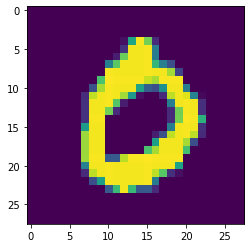

In [ ]:
# Check un tenseur
for image, label in dataset.take(1):
  print("This is a {}".format(label.numpy()))
  plt.imshow(tf.reshape(image, (28,28)))

Il est souvent recommandé de créer des batch d'images pour l'entrainement. Cela permet d'accélérer l'entrainement. Voici comment nous pouvons faire.

In [ ]:
# Création de batches
dataset = dataset.batch(8)

# Chaque élément de dataset contiendra maintenant 8 images et 8 labels (un batch de taille 8)
dataset

<BatchDataset shapes: ((None, 784), (None, 1)), types: (tf.int64, tf.int64)>

In [ ]:
# Exemple
# On prend un élément de dataset
for images, labels in dataset.take(1):
  print(images)

tf.Tensor(
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], shape=(8, 784), dtype=int64)


Passons maintenant au modèle. Cette fois nous allons créer un réseau de neurones avec : 

* Une couche d'entrée 
* Deux couches cachées 
* Une couche de sortie

Pour les couches d'entrées et cachées, nous utiliserons la fonction d'activation [`relu`](https://www.tensorflow.org/api_docs/python/tf/nn/relu) plus performante que `sigmoid`.

NB: Relu ---> $f(x)=max(x, 0)$

In [ ]:
# Create a model 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(32, activation="relu", input_shape=[784]),
                             tf.keras.layers.Dense(16, activation="relu"),
                             tf.keras.layers.Dense(8, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

Une fois que vous avez créé l'architecture de votre réseau de neurones, vous devrez créer un [*compileur*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile). Cet objet va stocker un Optimiseur qui va s'occuper de gérer votre learning rate ainsi que votre fonction de coût. Dans notre cas, nous utiliserons la `binary_crossentropy`

In [ ]:
# Compile your model 
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss=tf.losses.binary_crossentropy
)

C'est parti pour l'entrainement de notre modèle

In [ ]:
# train your model 
model.fit(dataset, epochs=10)

Epoch 1/10
265/265 [==============================] - 3s 11ms/step - loss: 0.4086
Epoch 2/10
265/265 [==============================] - 1s 3ms/step - loss: 0.0571
Epoch 3/10
265/265 [==============================] - 1s 3ms/step - loss: 0.1291
Epoch 4/10
265/265 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 5/10
265/265 [==============================] - 1s 3ms/step - loss: 0.0146
Epoch 6/10
265/265 [==============================] - 1s 3ms/step - loss: 1.8754e-10
Epoch 7/10
265/265 [==============================] - 1s 3ms/step - loss: 1.6313e-10
Epoch 8/10
265/265 [==============================] - 1s 3ms/step - loss: 1.5299e-10
Epoch 9/10
265/265 [==============================] - 1s 4ms/step - loss: 1.4404e-10
Epoch 10/10
265/265 [==============================] - 1s 3ms/step - loss: 1.3620e-10


Regardons quelques prédictions ! 

Prediction: [0.]


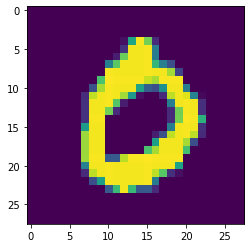

Prediction: [0.]


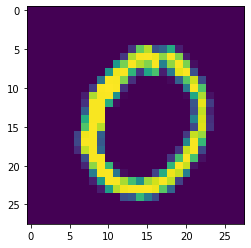

Prediction: [0.]


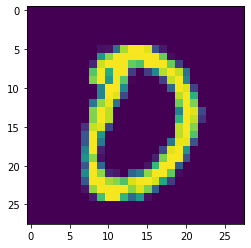

Prediction: [0.]


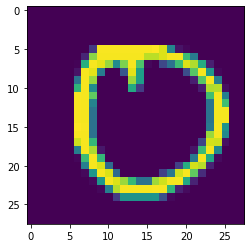

Prediction: [0.]


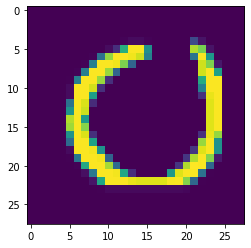

Prediction: [0.]


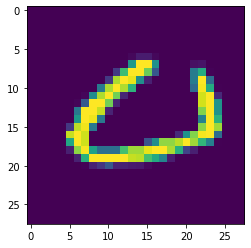

Prediction: [0.]


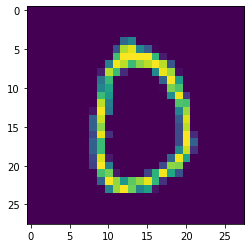

Prediction: [0.]


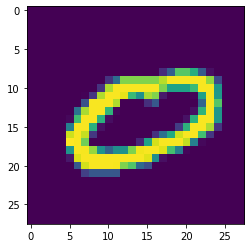

Prediction: [0.]


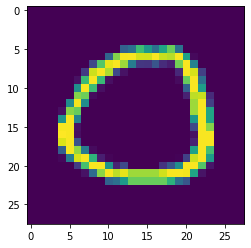

Prediction: [0.]


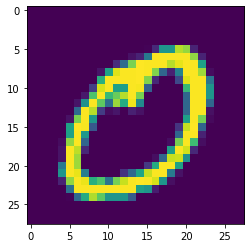

In [ ]:
# Make predictions 
for images, labels in dataset.take(10):
  print("Prediction: {}".format(model.predict(images)[0]))
  plt.imshow(images.numpy()[0].reshape(28,28))
  plt.show()
  